In [156]:
from __future__ import division
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler

In [157]:
X_train = pd.read_csv('Data/X_train.csv').set_index('Doctor Identifier')
provider2num = {}
ctr = 0
for provider in list(set(X_train['Provider Type'])):
    provider2num[provider] = ctr
    ctr += 1
X_train['Provider Type'] = [provider2num[d] for d in X_train['Provider Type']]

In [158]:
print(X_train.shape)
X_train.head()

(18000, 30)


,Provider Type,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,...,Percent Depression,Percent Diabetes,Percent Hyperlipidemia,Percent Hypertension,Percent Ischemic Heart Disease,Percent Osteoporosis,Percent Rheumatoid Arthritis or Osteoarthritis,Percent Schizophrenia or Other Psychotic Disorders,Percent Stroke,Average HCC Risk Score of Beneficiaries
Doctor Identifier,,,,,,,,,,,,,,,,,,,,,
450181093,22,491,66,52550.00,45827.70,34211.71,32460.86,0,0.00,0.00,...,75.0,18.00,41.0,50.0,3.11,0.83,23.0,18.00,0.65,1.28
375128823,67,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,18847.34,...,42.0,24.00,48.0,56.0,22.00,9.00,38.0,7.00,10.00,1.52
429379427,12,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,22049.04,...,24.0,19.00,44.0,57.0,25.00,12.00,67.0,4.00,7.00,1.11
993555030,63,43,42,2935.00,2932.84,1652.31,4208.75,0,0.00,0.00,...,31.0,0.89,62.0,57.0,36.00,0.27,38.0,0.44,0.25,1.00
786413532,23,151,34,13118.00,3991.45,3911.61,3402.45,0,0.00,0.00,...,56.0,75.00,75.0,75.0,41.00,0.05,56.0,0.00,0.03,1.57


In [138]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [139]:
pca.explained_variance_ratio_

array([  9.70140442e-01,   2.30655427e-02,   6.12754219e-03,
         3.72254359e-04,   2.33062320e-04,   4.72001058e-05,
         1.05876913e-05,   2.96855982e-06,   2.41048760e-07,
         1.54377373e-07,   3.24251809e-09,   6.15431771e-10,
         4.04662041e-10,   1.12436717e-10,   1.03038901e-10,
         6.30414216e-11,   3.45897633e-11,   2.67411322e-11,
         2.27165861e-11,   2.04046800e-11,   1.75305094e-11,
         1.35892651e-11,   1.23447810e-11,   1.01322706e-11,
         7.15715789e-12,   6.32005363e-12,   5.05234947e-12,
         3.84448776e-12,   3.74724190e-12,   2.82248469e-14])

In [140]:
pca.components_[0]

array([  2.20246291e-08,   8.78564400e-03,   6.32417820e-04,
         9.52081178e-01,   1.90653059e-01,   1.68080683e-01,
         1.67867208e-01,   1.07773605e-04,   2.05326843e-02,
         9.19030312e-03,   7.18996607e-03,   7.19088597e-03,
         8.67582148e-03,   3.82871039e-07,   3.11786902e-07,
         2.53068064e-07,   2.92069276e-07,   4.39249754e-07,
         5.15345420e-07,   3.46518105e-07,   1.02466197e-08,
         4.56424478e-07,   7.38632741e-07,   7.57704168e-07,
         5.87630315e-07,   2.57142992e-07,   5.20173822e-07,
         8.68310010e-08,   1.87252188e-07,   8.84243591e-09])

In [141]:
cols_sorted = X_train.columns[np.argsort(pca.components_[0])[::-1]].values
print(cols_sorted)

['Total Submitted Charge Amount' 'Total Allowed Amount'
 'Total Payment Amount' 'Total Standardized Payment Amount'
 'Total Drug Submitted Charge Amount' 'Total Drug Allowed Amount '
 'Number of Services' 'Number of Medical Services'
 'Total Drug Standardized Payment Amount' 'Total Drug Payment Amount '
 'Number of Beneficiaries' 'Number of Drug Services'
 'Percent Hypertension ' 'Percent Hyperlipidemia '
 'Percent Ischemic Heart Disease '
 'Percent Rheumatoid Arthritis or Osteoarthritis '
 'Percent Chronic Kidney Disease' 'Percent Diabetes '
 'Percent Heart Failure ' 'Percent Atrial Fibrillation'
 'Percent Chronic Obstructive Pulmonary Disease'
 'Percent Alzheimer\xc3\xa2\xe2\x82\xac\xe2\x84\xa2s Disease or Dementia '
 'Percent Cancer ' 'Percent Osteoporosis ' 'Percent Asthma '
 'Percent Stroke ' 'Percent Schizophrenia or Other Psychotic Disorders '
 'Provider Type' 'Percent Depression '
 'Average HCC Risk Score of Beneficiaries ']


*** The explained variance of the first PCA component is 97%. This components appears to mostly describe charge amounts and payment amounts. ***

In [142]:
X_adj = pd.DataFrame()
X_adj['ChargePerPatient'] = X_train['Total Submitted Charge Amount']/X_train['Number of Beneficiaries']
X_adj['DrugChargePerPatient'] = X_train['Total Drug Submitted Charge Amount']/X_train['Number of Beneficiaries']
X_adj['PercentChargePaid'] = X_train['Total Payment Amount']/X_train['Total Submitted Charge Amount']
X_adj['PercentDrugChargePaid'] = X_train['Total Drug Payment Amount ']/X_train['Total Submitted Charge Amount']
X_adj['PercentAllowedPaid'] = X_train['Total Payment Amount']/X_train['Total Allowed Amount']
X_adj['PercentChargeAllowed'] = X_train['Total Submitted Charge Amount']/X_train['Total Allowed Amount']
X_adj['AveragePatientRisk'] = X_train['Average HCC Risk Score of Beneficiaries ']

print(X_adj.shape)
X_adj.head()

(18000, 7)


,ChargePerPatient,DrugChargePerPatient,PercentChargePaid,PercentDrugChargePaid,PercentAllowedPaid,PercentChargeAllowed,AveragePatientRisk
Doctor Identifier,,,,,,,
450181093,796.212121,0.000000,0.651032,0.000000,0.746529,1.146686,1.28
375128823,783.924171,137.052133,0.376390,0.089333,0.739264,1.964089,1.52
429379427,841.114320,50.702927,0.327816,0.032097,0.756085,2.306430,1.11
993555030,69.880952,0.000000,0.562968,0.000000,0.563382,1.000736,1.00
786413532,385.823529,0.000000,0.298186,0.000000,0.979997,3.286525,1.57


In [143]:
X_adj.to_csv("X_adj.csv")

In [144]:
print "Average Charge Per Patient:", np.mean(X_adj.ChargePerPatient)
print "Standard Dev Charge Per Patient:", np.std(X_adj.ChargePerPatient)
X_adj.sort_values(by=['ChargePerPatient'], ascending=False).head(10)

Average Charge Per Patient: 1125.30825161
Standard Dev Charge Per Patient: 10549.8475495


,ChargePerPatient,DrugChargePerPatient,PercentChargePaid,PercentDrugChargePaid,PercentAllowedPaid,PercentChargeAllowed,AveragePatientRisk
Doctor Identifier,,,,,,,
384220740,1.314173e+06,1314172.89,0.335775,0.335775,0.783954,2.334761,3.15
715390327,3.676962e+05,0.00,0.115020,0.000000,0.761992,6.624886,2.84
970788777,1.428823e+05,0.00,0.312982,0.000000,0.695516,2.222222,3.46
621690803,1.356667e+05,0.00,0.147503,0.000000,0.736119,4.990523,1.74
996108193,1.183366e+05,0.00,0.159847,0.000000,0.979695,6.128958,2.48
886011918,1.125924e+05,0.00,0.224126,0.000000,0.797859,3.559873,0.60
259764167,9.296184e+04,0.00,0.557658,0.000000,0.772319,1.384933,3.83
932051490,8.669140e+04,0.00,0.483661,0.000000,0.728297,1.505800,0.94
750384742,7.945644e+04,0.00,0.317072,0.000000,0.732451,2.310049,1.24


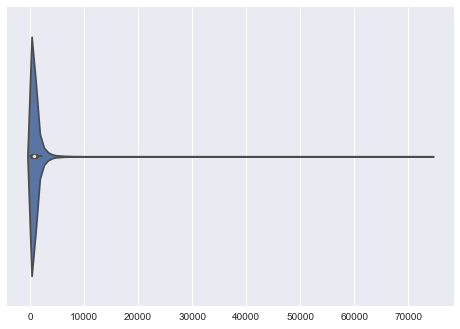

In [145]:
sns.violinplot(sorted(X_adj.ChargePerPatient)[:-10])
plt.show()

*** Charge per patient distribution appears to be bimodal. ***

In [146]:
pca = PCA()
pca.fit(X_adj)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [147]:
pca.explained_variance_ratio_

array([  9.64292096e-01,   3.57078865e-02,   1.52252077e-08,
         2.15064194e-09,   1.25451421e-10,   2.23470927e-11,
         9.10521022e-12])

In [148]:
pca.components_[0]

array([  7.34629586e-01,   6.78468402e-01,  -2.03064354e-07,
         1.02447786e-07,   1.86825742e-08,   2.36041283e-06,
         1.37520712e-06])

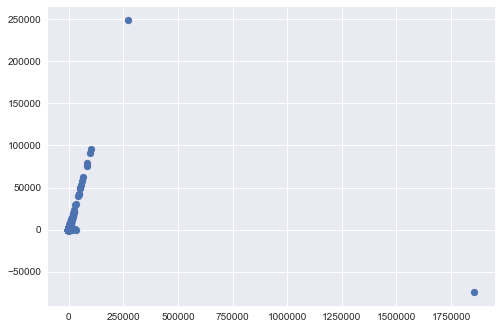

In [149]:
transformed = pca.transform(X_adj)
plt.scatter(transformed[:,0], transformed[:,1])
plt.show()

*** Charge per patient and drug charge per patient explain 96% of the variance. ***

In [150]:
X_adj.to_csv('Data/X_adj.csv')
X_train.to_csv('Data/X_train_numerical.csv')

# Keras Autoencoder

In [151]:
X_train = pd.get_dummies(X_train, columns = ["Provider Type"])
X_train.shape

(18000, 113)

In [152]:
scaler = MinMaxScaler()
X_adj_std = scaler.fit_transform(X_adj.values)
X_adj_std = pd.concat([pd.DataFrame(X_adj_std, index=X_train.index), X_train.iloc[:,-84:]], axis=1)
print X_adj_std.shape
X_adj_std.head()

(18000, 91)


,0,1,2,3,4,5,6,Provider Type_0,Provider Type_1,Provider Type_2,...,Provider Type_74,Provider Type_75,Provider Type_76,Provider Type_77,Provider Type_78,Provider Type_79,Provider Type_80,Provider Type_81,Provider Type_82,Provider Type_83
Doctor Identifier,,,,,,,,,,,,,,,,,,,,,
450181093,-0.031194,-0.010007,1.758569,-0.248966,-0.260002,-1.015026,-0.424255,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375128823,-0.032359,0.003979,0.233448,0.499516,-0.376844,-0.555268,-0.070972,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429379427,-0.026938,-0.004833,-0.036290,0.019963,-0.106314,-0.362714,-0.674497,0,0,0,...,0,0,0,0,0,0,0,0,0,0
993555030,-0.100042,-0.010007,1.269537,-0.248966,-3.205459,-1.097118,-0.836419,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786413532,-0.070094,-0.010007,-0.200829,-0.248966,3.494747,0.188552,0.002629,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
input_dim = X_adj_std.shape[1]
encoding_dim = 20

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

nb_epoch = 300
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error')
history = autoencoder.fit(X_adj_std.values, 
                          X_adj_std.values,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          verbose=0).history

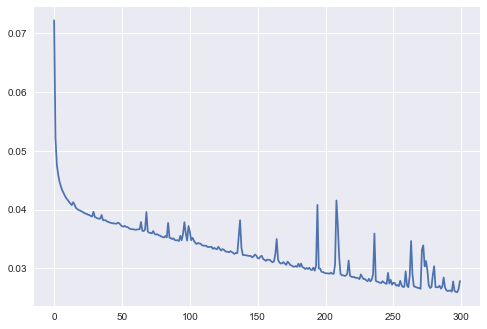

In [154]:
plt.plot(history['loss'])
plt.show()

In [133]:
predictions = autoencoder.predict(X_adj_std.values)
mse = np.mean(np.power(X_adj_std.values - predictions, 2), axis=1)
risk_df = pd.DataFrame({'Doctor Identifier': X_adj_std.index.values,
                        'Risk': mse})

In [134]:
risk_df.to_csv('autoencoder_1.csv', index=False)

# Gaussian Probabilities

In [216]:
X_train_test = pd.read_csv('Data/X_train_test.csv').set_index('Doctor Identifier')
provider2num = {}
ctr = 0
for provider in list(set(X_train_test['Provider Type'])):
    provider2num[provider] = ctr
    ctr += 1
X_train_test['Provider Type'] = [provider2num[d] for d in X_train_test['Provider Type']]

In [217]:
#merge provider types
providernums = np.argsort([list(X_train_test['Provider Type']).count(i) for i in range(84)])[:8]
X_train_test['Provider Type'] = [-1 if (a in providernums) else a for a in X_train_test['Provider Type']]
X_train_test.to_csv('Data/X_train_test3.csv')

In [218]:
X_train_test.shape

(27743, 30)

In [200]:
return_df = pd.DataFrame(columns=['Risk'])
for providertype in range(84):
    df = X_train_test[X_train_test['Provider Type'] == providertype].iloc[:,1:]
    means = df.mean(axis=0)
    stdevs = df.std(axis=0)
    for docid in df.index.values:
        if docid in X_train.index.values:
            logprob = 0
            for e,col in enumerate(df.columns.values):
                logprob += stats.norm.logpdf(df.loc[docid, col], means[e], stdevs[e])
            return_df.loc[docid] = logprob

In [202]:
return_df.to_csv('gaussian.csv')